In [2]:
import cirq

import numpy as np
import matplotlib.pyplot as plt
import random

In [409]:
# Exercise 2: Generate & Measure EPR Pairs

q_0 = cirq.NamedQubit('q_0')
q_1 = cirq.NamedQubit('q_1')
qc = cirq.Circuit()
qc.append([cirq.H(q_0), cirq.CNOT(q_0, q_1)])

print(qc)

q_0: ───H───@───
            │
q_1: ───────X───


In [410]:
sv = qc.final_state_vector()
print(np.around(sv, 3))

[ 0.707+0.j  0.   +0.j -0.   +0.j  0.707+0.j]


In [411]:
### Generalizing as a fn.
def bell_generator(index):

    q_0 = cirq.NamedQubit('q_0')
    q_1 = cirq.NamedQubit('q_1')
    qc = cirq.Circuit()

    qc.append([cirq.H(q_0), cirq.CNOT(q_0, q_1)])

    if index == 1:
        #create bell_1
        pass
    elif index == 2:
        qc.insert(0, [cirq.X(q_0)])
    elif index == 3:
        qc.insert(0, [cirq.X(q_1)])
    elif index == 4:
        qc.insert(0, [cirq.X(q_0), cirq.X(q_1)])

    return qc


In [412]:
# index: {1,2,3,4} corresponds to
# bell state: {phi+, phi-, psi+, psi-} respectively

for i in range(1,5):
    bell_i = bell_generator(i)
    print('Bell circuit no:', i)
    print(bell_i)


Bell circuit no: 1
q_0: ───H───@───
            │
q_1: ───────X───
Bell circuit no: 2
q_0: ───X───H───@───
                │
q_1: ───────────X───
Bell circuit no: 3
q_0: ───H───@───
            │
q_1: ───X───X───
Bell circuit no: 4
q_0: ───X───H───@───
                │
q_1: ───X───────X───


In [413]:
# And how to measure an unknown Bell state?
# We need a bell measurement

def bell_meas(qc):
    qc.append([cirq.CNOT(q_0, q_1), cirq.H(q_0), cirq.measure(q_0, q_1)])
    

In [414]:
print(qc)

q_0: ───H───@───
            │
q_1: ───────X───


In [415]:
q_0 = cirq.NamedQubit('q_0')
q_1 = cirq.NamedQubit('q_1')

qc = bell_generator(1)

bell_meas(qc)
print(qc)


q_0: ───H───@───@───H───M───
            │   │       │
q_1: ───────X───X───────M───


In [416]:
qc.final_state_vector()

array([ 1.+0.j,  0.+0.j, -0.+0.j,  0.+0.j])

In [417]:
for i in range(1,5):
    qc = bell_generator(i)
    bell_meas(qc)

    sv = qc.final_state_vector()
    print('the final statevector for bell state', i, 'is:')
    print(sv)

# phi+ gives 00
# phi- gives 10
# psi+ gives 01
# psi- gives 11

the final statevector for bell state 1 is:
[ 1.+0.j  0.+0.j -0.+0.j  0.+0.j]
the final statevector for bell state 2 is:
[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
the final statevector for bell state 3 is:
[ 0.+0.j  1.+0.j  0.+0.j -0.+0.j]
the final statevector for bell state 4 is:
[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [418]:
# Exercise 4: Simulate the Quantum Teleport

def make_quantum_teleportation_circuit(gate):
    circuit = cirq.Circuit()

    # Get the three qubits involved in the teleportation protocol.
    msg = cirq.NamedQubit("Message")
    alice = cirq.NamedQubit("Alice")
    bob = cirq.NamedQubit("Bob")

    # to create the initial random state for Alice
    circuit.append(gate(msg))

    # Bell state
    circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])

    # Bell measurement
    circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg, alice)])

    # Uses the two classical bits from the Bell measurement to recover the
    # original quantum message on Bob's entangled qubit
    circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob)])

    return circuit

In [419]:
"""Visualize the teleportation circuit."""
# Gate to put the message qubit in some state to send.
gate = cirq.X ** 0.25

# Create the teleportation circuit.
circuit = make_quantum_teleportation_circuit(gate)
print("Teleportation circuit:\n")
print(circuit)

Teleportation circuit:

Alice: ─────H────────@───X───────M───@───────
                     │   │       │   │
Bob: ────────────────X───┼───────┼───X───@───
                         │       │       │
Message: ───X^0.25───────@───H───M───────@───


In [420]:
"""Display the Bloch vector of the message qubit."""
message = cirq.Circuit(gate.on(cirq.NamedQubit("Message"))).final_state_vector()
message_bloch_vector = cirq.bloch_vector_from_state_vector(message, index=0)
print("Bloch vector of message qubit:")
print(np.round(message_bloch_vector, 3))

Bloch vector of message qubit:
[ 0.    -0.707  0.707]


In [421]:
"""Simulate the teleportation circuit and get the final state of Bob's qubit."""
# Get a simulator.
sim = cirq.Simulator()

# Simulate the teleportation circuit.
result = sim.simulate(circuit)

# Get the Bloch vector of Bob's qubit.
bobs_bloch_vector = cirq.bloch_vector_from_state_vector(result.final_state_vector, index=1)
print("Bloch vector of Bob's qubit:")
print(np.round(bobs_bloch_vector, 3))

# Verify they are the same state!
np.testing.assert_allclose(bobs_bloch_vector, message_bloch_vector, atol=1e-7)

Bloch vector of Bob's qubit:
[ 0.    -0.707  0.707]


In [19]:
RX = cirq.rx(np.pi)

qc = cirq.Circuit([cirq.rx(np.pi).on(q_0)])
print(qc)

q_0: ───Rx(π)───


In [38]:
# Exercise 6: Rabi Oscillations
# Define the Trotterization

def U_t(q, w0, w1, w, dt, trotter_steps):

    for n in range(trotter_steps):
        yield cirq.rx(2*w1*dt*np.cos(w*n*dt)).on(q)
        yield cirq.rz(-w0*dt).on(q)

    #yield cirq.H(q)
    yield cirq.measure(q, key='out')



(0.0, 1000.0)

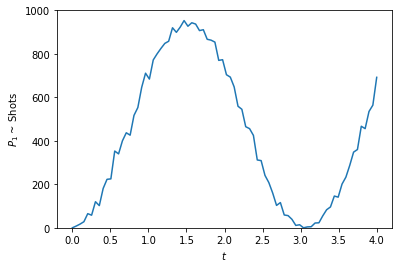

In [41]:
# a) use the following parameters with run method

w1 = 2
w0 = 25
w = 25.5
dt = 0.05
time = np.linspace(0, 4, 80)
# alternatively, trotter_steps = np.arange(0, int(4/dt), 1)

q_0 = cirq.NamedQubit('q_0')

prob_1 = []

for t in time:
    trotter = cirq.Circuit(U_t(q_0, w0, w1, w, dt, trotter_steps = int(t/dt)))
    sim = cirq.Simulator()
    result = sim.run(trotter, repetitions=1000)
    prob_1.append(np.mean(result.histogram(key='out')[1]))

plt.plot(time, prob_1)
plt.xlabel('$t$')
plt.ylabel('$P_1$ ~ Shots')
plt.ylim((0,1000))



(0.0, 1.0)

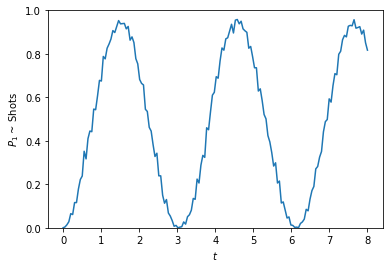

In [527]:
w1 = 2
w0 = 25
w = 25.5
dt = 0.05
t_max = 8
time = np.linspace(0, t_max, int(t_max/dt))
# alternatively, trotter_steps = np.arange(0, int(4/dt), 1)

q_0 = cirq.NamedQubit('q_0')

prob_1 = []

for t in time:
    qc = cirq.Circuit(U_t(q_0, w0, w1, w, dt, trotter_steps = int(t/dt)))
    sim = cirq.Simulator()
    result = cirq.sample(qc, repetitions=1000)
    prob = result.histogram(key='out')
    prob_1.append(prob[1]/1000)

plt.plot(time, prob_1)
plt.xlabel('$t$')
plt.ylabel('$P_1$ ~ Shots')
plt.ylim((0,1))

(0.0, 1.0)

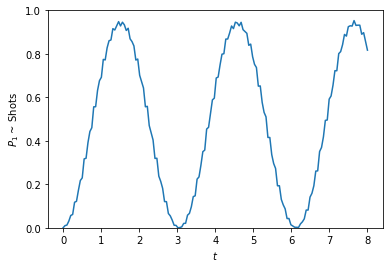

In [524]:
# Another alternative is to directly get the final statevector from qc

w1 = 2
w0 = 25
w = 25.5
dt = 0.05
t_max = 8
time = np.linspace(0, t_max, int(t_max/dt))
# alternatively, trotter_steps = np.arange(0, int(4/dt), 1)

q_0 = cirq.NamedQubit('q_0')

prob_1 = []

for t in time:
    qc = cirq.Circuit(U_t(q_0, w0, w1, w, dt, trotter_steps = int(t/dt)))
    sv = qc.final_state_vector()
    prob = np.abs(sv[1])**2
    prob_1.append(prob)

plt.plot(time, prob_1)
plt.xlabel('$t$')
plt.ylabel('$P_1$ ~ Shots')
plt.ylim((0,1))

(0.0, 1.0)

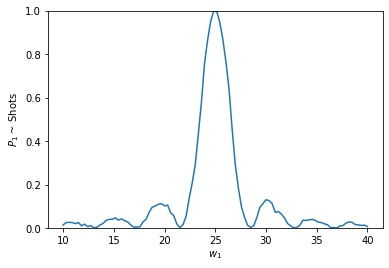

In [530]:
# b) with different detunings, fixed time

w1 = 2
w0 = 25
w_ext = np.linspace(10, 40, 100)
dt = 0.05
t = np.pi / w1
# alternatively, trotter_steps = np.arange(0, int(4/dt), 1)

q_0 = cirq.NamedQubit('q_0')

prob_1 = []

for w in w_ext:
    qc = cirq.Circuit(U_t(q_0, w0, w1, w, dt, trotter_steps = int(t/dt)))
    sim = cirq.Simulator()
    result = sim.run(qc, repetitions=1000)
    prob_1.append(result.histogram(key='out')[1]/1000)

plt.plot(w_ext, prob_1)
plt.xlabel('$w_1$')
plt.ylabel('$P_1$ ~ Shots')
plt.ylim((0,1))

(0.0, 1.0)

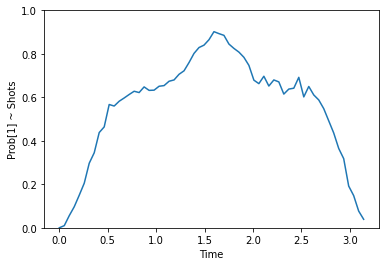

In [538]:
# c)

w1 = 2
w0 = 2
w = 2
dt = 0.05
t_max = np.pi
time = np.linspace(0, t_max, int(t_max/dt))
# alternatively, trotter_steps = np.arange(0, int(4/dt), 1)

q_0 = cirq.NamedQubit('q_0')

prob_1 = []

for t in time:
    qc = cirq.Circuit(U_t(q_0, w0, w1, w, dt, trotter_steps = int(t/dt)))
    qc.append(cirq.measure(q_0, key='z'))
    
    sim = cirq.Simulator()
    result = sim.run(qc, repetitions=1000)
    prob_1.append(np.mean(result.measurements['z']))

plt.plot(time, prob_1)
plt.xlabel('Time')
plt.ylabel('Prob[1] ~ Shots')
plt.ylim((0,1))

Text(0.5, 0.98, 'Noisy Simulation')

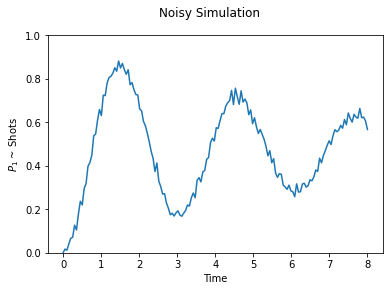

In [79]:
# Exercise 7: Noise & Damped Rabi Oscillations
p = 0.9
gamma =0.005
noise = cirq.ConstantQubitNoiseModel(
            cirq.GeneralizedAmplitudeDampingChannel(p,gamma))

w1 = 2
w0 = 25
w = 25.5
dt = 0.05
t_max = 8
time = np.linspace(0, t_max, int(t_max/dt))
# alternatively, trotter_steps = np.arange(0, int(4/dt), 1)

q_0 = cirq.NamedQubit('q_0')

prob_1 = []

for t in time:
    trotter = cirq.Circuit(U_t(q_0, w0, w1, w, dt, trotter_steps = int(t/dt)))
    result = cirq.sample(trotter, noise=noise, repetitions=1024)
    prob = result.histogram(key='out')
    prob_1.append(prob[1]/1000)

plt.plot(time, prob_1)
plt.xlabel('Time')
plt.ylabel('$P_1$ ~ Shots')
plt.ylim((0,1))
plt.suptitle('Noisy Simulation')


In [462]:
# Exercise 8: Single-qubit 

# define S_dagger gate which stupidly doesn't exist in Cirq???
class S_dag_Gate(cirq.Gate):
    def __init__(self):
        super(S_dag_Gate, self)

    def _num_qubits_(self):
        return 1

    def _unitary_(self):
        return np.array([[1,0],[0, -1j]])

    def _circuit_diagram_info_(self, args):
        return "S_dag"
    
S_dag = S_dag_Gate()

s_dag_cirq = cirq.Circuit(S_dag(q_0))
print(s_dag_cirq)

q_0: ───S_dag───


In [429]:
def single_qubit_tomography(sampler, qubit, circuit, repetitions):
    qc_z = cirq.Circuit(circuit, cirq.ops.measure(qubit, key='z'))
    results = sampler.run(qc_z, repetitions=repetitions)
    rho_11 = np.mean(results.measurements['z'])
    rho_00 = 1.0 - rho_11

    qc_x = cirq.Circuit(circuit, cirq.ops.H(qubit), cirq.ops.measure(qubit, key='z'))
    results = sampler.run(qc_x, repetitions=repetitions)
    rho_01_im = np.mean(results.measurements['z'])

    qc_y = cirq.Circuit(circuit, S_dag(qubit), cirq.H(qubit), cirq.ops.measure(qubit, key='z'))
    results = sampler.run(qc_y, repetitions=repetitions)
    rho_01_re = np.mean(results.measurements['z'])

    rho_01 = rho_01_re + rho_01_im*1j
    rho_10 = np.conj(rho_01)

    rho = np.array([[rho_00, rho_01],
                    [rho_10, rho_11]])

    return rho

In [430]:
sampler = cirq.Simulator()
qubit = cirq.NamedQubit('qubit')
qc = cirq.Circuit([cirq.H(qubit)])
repetitions = 10000

print(qc)
single_qubit_tomography(sampler, qubit, qc, repetitions)

qubit: ───H───


array([[0.5001+0.j, 0.5001+0.j],
       [0.5001-0.j, 0.4999+0.j]])

In [431]:
result = cirq.experiments.single_qubit_state_tomography(sampler, qubit, qc, repetitions)
result.data

array([[0.5038+0.j    , 0.5   -0.0051j],
       [0.5   +0.0051j, 0.4962+0.j    ]])

In [432]:
# Exercise 9: Given state

qc_ex_9 = cirq.Circuit(qc, cirq.rz(np.pi/2).on(qubit))
print(qc_ex_9)
sv = qc_ex_9.final_state_vector()
print(cirq.qis.dirac_notation(sv))

#single_qubit_tomography(sampler, qubit, qc, repetitions)

qubit: ───H───Rz(0.5π)───
(0.5-0.5j)|0⟩ + (0.5+0.5j)|1⟩


(0.0, 1.0)

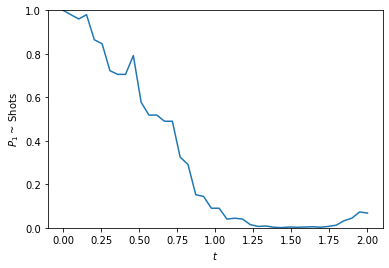

In [446]:
# Exercise 10: Reconstruct Ex.6 with Tomography

w1 = 2
w0 = 25
w = 25.5
dt = 0.05
t_max = 2
time = np.linspace(0, t_max, int(t_max/dt))
# alternatively, trotter_steps = np.arange(0, int(4/dt), 1)

q_0 = cirq.NamedQubit('q_0')

prob_1 = []
sampler = cirq.Simulator()

for t in time:
    trotter = cirq.Circuit(cirq.X(q_0), U_t(q_0, w0, w1, w, dt, trotter_steps = int(t/dt)))
    rho = single_qubit_tomography(sampler, q_0, trotter, repetitions=100)
    prob = np.abs(rho[1,1])**2
    prob_1.append(prob)

plt.plot(time, prob_1)
plt.xlabel('$t$')
plt.ylabel('$P_1$ ~ Shots')
plt.ylim((0,1))


In [506]:
# Exercise 11: VQE
# Ansatz -- Z1 and Z2 commutes, so does Z1 ^ X2 and X1 ^ Z2
# then we can take the sums as simple products
# Let's first define the RZZ gate

class RZZ_Gate(cirq.Gate):
    def __init__(self, theta):
        super(RZZ_Gate, self)
        self.theta = theta

    def _num_qubits_(self):
        return 2

    def _unitary_(self):
        return np.array([[np.exp(-1j*self.theta/2),np.exp(1j*self.theta/2)],
                        [np.exp(1j*self.theta/2), np.exp(-1j*self.theta/2)]])

    def _circuit_diagram_info_(self, args):
        return [f"R_ZZ({np.around(self.theta,5)})"] * 2

qc = cirq.Circuit(RZZ_Gate(theta=np.pi).on(q_0, q_1))


In [507]:
print(qc)

q_0: ───R_ZZ(3.14159)───
        │
q_1: ───R_ZZ(3.14159)───


In [508]:
# We could also make RZZ from 2 CNOTs and 1 RZ

ansatz = cirq.Circuit()

In [568]:
# BUGGED AND WON'T RUN WITH THIS FOR SOME REASON
#def ansatz_circuit(a, b):
#    #implements Z1 X2
#    yield cirq.ry(np.pi/2).on(q_1)
#    yield RZZ_Gate(2*b).on(q_0, q_1)
#    yield cirq.ry(-np.pi/2).on(q_0)
#
#    #implements X1 Z2
#    yield cirq.ry(np.pi/2).on(q_0)
#    yield RZZ_Gate(2*b).on(q_0, q_1)
#    yield cirq.ry(-np.pi/2).on(q_0)
#
#    #implements RZ
#    yield cirq.rz(2*a).on(q_0)
#    yield cirq.rz(2*a).on(q_1)
    


In [26]:
def ansatz_circuit(q_0, q_1, a, b):
    # implements Z1 X2
    #yield cirq.ry(np.pi/2).on(q_1)
    yield cirq.H(q_1)
    yield cirq.ZZPowGate(exponent=2/np.pi * b, global_shift=-0.5).on(q_0, q_1)
    #yield cirq.CNOT(q_0, q_1)
    #yield cirq.rz(2*b).on(q_1)
    #yield cirq.CNOT(q_0, q_1)
    yield cirq.H(q_1)
    #yield cirq.ry(-np.pi/2).on(q_1)


    # implements X1 Z2
    #yield cirq.ry(np.pi/2).on(q_0)
    yield cirq.H(q_0)
    yield cirq.ZZPowGate(exponent=2/np.pi * b, global_shift=-0.5).on(q_0, q_1)
    #yield cirq.CNOT(q_0, q_1)
    #yield cirq.rz(2*b).on(q_1)
    #yield cirq.CNOT(q_0, q_1)
    yield cirq.H(q_0)
    #yield cirq.ry(-np.pi/2).on(q_0)

    # implements RZs
    yield cirq.ZPowGate(exponent=2/np.pi*a, global_shift=-0.5).on(q_0)
    yield cirq.ZPowGate(exponent=2/np.pi*a, global_shift=-0.5).on(q_1)

-1.994


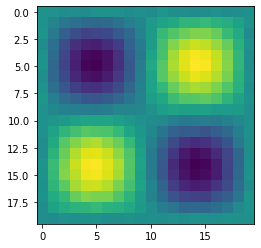

In [35]:
a_list = list(np.linspace(0, np.pi, 20))
b_list = list(np.linspace(0, np.pi, 20))

q_0 = cirq.NamedQubit('q_0')
q_1 = cirq.NamedQubit('q_1')

sim = cirq.Simulator()

H_expec_list = np.zeros((20,20))
results_zx = []
results_xz = []

for a in a_list:
    for b in b_list:
        ansatz = cirq.Circuit(ansatz_circuit(q_0, q_1, a, b))
        # measure Z1 X2 ie. qubit 0 in Z, qubit 1 in X basis
        zx_cirq = cirq.Circuit(ansatz, cirq.H(q_1), cirq.measure(q_0, q_1, key='zx'))
        
        result_zx = sim.run(zx_cirq, repetitions=1000)
        results_zx = 4*(result_zx.measurements['zx'][:,0]-0.5) * (result_zx.measurements['zx'][:,1]-0.5)
        #for i in range(1000):
        #    hey = result_zx.measurements['zx'][i][0] * result_zx.measurements['zx'][i][1]
        #    results_zx.append(hey)
        
        zx_expec = np.mean(results_zx)

        xz_cirq = cirq.Circuit(ansatz, cirq.H(q_0), cirq.measure(q_0, q_1, key='xz'))
        
        result_xz = sim.run(xz_cirq, repetitions=1000)
        results_xz = 4*(result_xz.measurements['xz'][:,0]-0.5) * (result_xz.measurements['xz'][:,1]-0.5)
        
        xz_expec = np.mean(results_xz)
        
        H_expec = -xz_expec -zx_expec
        H_expec_list[a_list.index(a), b_list.index(b)] = H_expec
#print(result_zx.measurements['zx'][0][0])

#min(H_expec_list)      
plt.imshow(H_expec_list)       
print(np.min(H_expec_list))

In [65]:
np.argmin(H_expec_list)
H_expec_list[14][14]

-1.994

In [67]:
H_expec_list[14][14]
a_min = a_list[14]
b_min = b_list[14]
a_min,b_min

(2.3148577447503738, 2.3148577447503738)

In [71]:
optimal_vqe = cirq.Circuit(ansatz_circuit(q_0, q_1, a_min, b_min))
result = sim.simulate(optimal_vqe).dirac_notation()
result

'(-0.04+0.46j)|00⟩ + 0.5j|01⟩ + 0.5j|10⟩ + (-0.04-0.54j)|11⟩'

-1.912


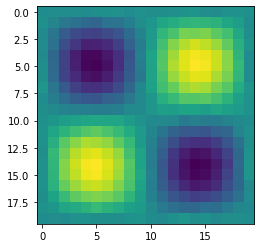

In [78]:
a_list = list(np.linspace(0, np.pi, 20))
b_list = list(np.linspace(0, np.pi, 20))

q_0 = cirq.NamedQubit('q_0')
q_1 = cirq.NamedQubit('q_1')

sim = cirq.Simulator()

H_expec_list = np.zeros((20,20))
results_zx = []
results_xz = []

for a in a_list:
    for b in b_list:
        ansatz = cirq.Circuit(ansatz_circuit(q_0, q_1, a, b))
        # measure Z1 X2 ie. qubit 0 in Z, qubit 1 in X basis
        zx_cirq = cirq.Circuit(ansatz, cirq.H(q_1), cirq.measure(q_0, q_1, key='zx'))
        
        result_zx = cirq.sample(zx_cirq, noise=noise, repetitions=1000)
        results_zx = 4*(result_zx.measurements['zx'][:,0]-0.5) * (result_zx.measurements['zx'][:,1]-0.5)
        #for i in range(1000):
        #    hey = result_zx.measurements['zx'][i][0] * result_zx.measurements['zx'][i][1]
        #    results_zx.append(hey)
        
        zx_expec = np.mean(results_zx)

        xz_cirq = cirq.Circuit(ansatz, cirq.H(q_0), cirq.measure(q_0, q_1, key='xz'))
        
        result_xz = cirq.sample(xz_cirq, noise=noise, repetitions=1000)
        results_xz = 4*(result_xz.measurements['xz'][:,0]-0.5) * (result_xz.measurements['xz'][:,1]-0.5)
        
        xz_expec = np.mean(results_xz)
        
        H_expec = -xz_expec -zx_expec
        H_expec_list[a_list.index(a), b_list.index(b)] = H_expec
#print(result_zx.measurements['zx'][0][0])

print(np.min(H_expec_list))     
plt.imshow(H_expec_list)       
